**Table of contents**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)    
  - 1.1. [Basics Mathematics](#toc1_1_)    
  - 1.2. [Factorization](#toc1_2_)    
  - 1.3. [Expandation](#toc1_3_)    
  - 1.4. [Simplification](#toc1_4_)    
- 2. [Equations](#toc2_)    
  - 2.1. [Solving f(x) = 0](#toc2_1_)    
  - 2.2. [Solving f(x,y,z) = 0](#toc2_2_)    
  - 2.3. [System of equations](#toc2_3_)    
  - 2.4. [Differentiels Equiation](#toc2_4_)    
    - 2.4.1. [Symbolic solution](#toc2_4_1_)    
    - 2.4.2. [Non symbolic](#toc2_4_2_)    
  - 2.5. [Symbolic to Numircal](#toc2_5_)    
  - 2.6. [Substitution](#toc2_6_)    
- 3. [Calculus](#toc3_)    
  - 3.1. [Limits](#toc3_1_)    
  - 3.2. [Derivitives](#toc3_2_)    
    - 3.2.1. [First derivative](#toc3_2_1_)    
    - 3.2.2. [Nth-derivative](#toc3_2_2_)    
  - 3.3. [Abstract functions](#toc3_3_)    
  - 3.4. [Integrals](#toc3_4_)    
    - 3.4.1. [Primitive (antiderivative)](#toc3_4_1_)    
    - 3.4.2. [Definite Integral](#toc3_4_2_)    
    - 3.4.3. [Improper Integrals](#toc3_4_3_)    
    - 3.4.4. [Multiple Integrals](#toc3_4_4_)    
- 4. [Discrete Math](#toc4_)    
  - 4.1. [Combinatory Analysis](#toc4_1_)    
  - 4.2. [Summation](#toc4_2_)    
  - 4.3. [Production](#toc4_3_)    
  - 4.4. [Taylor Series](#toc4_4_)    
- 5. [Matrix and Linear Algebra](#toc5_)    
  - 5.1. [Special Matrix](#toc5_1_)    
  - 5.2. [Matrix Operations](#toc5_2_)    
- 6. [Geometry](#toc6_)    
- 7. [Plotting](#toc7_)    
  - 7.1. [Plot 2D](#toc7_1_)    
    - 7.1.1. [Plot 3D](#toc7_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Introduction](#toc0_)

**SymPy** is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.

Official site : https://www.sympy.org/en/index.html

In [27]:
# Install package
#!pip install numpy
#!pip install matplotlib
#!pip install sympy

In [28]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

## 1.1. <a id='toc1_1_'></a>[Basics Mathematics](#toc0_)

In [29]:
x = smp.symbols('x', real=True) 
x**2

x**2

In [30]:
smp.sin(x**2) / x**smp.Rational(1,3)

sin(x**2)/x**(1/3)

In [31]:
(x**2 + 4*x + 3)**2

(x**2 + 4*x + 3)**2

In [32]:
f = (x**2 + 4*x + 3)**2
f

(x**2 + 4*x + 3)**2

## 1.2. <a id='toc1_2_'></a>[Factorization](#toc0_)

$$ (x + 1)^2 (x + 3)^2  $$

In [39]:
f.factor()

(x + 1)**2*(x + 3)**2

## 1.3. <a id='toc1_3_'></a>[Expandation](#toc0_)

In [11]:
f.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

## 1.4. <a id='toc1_4_'></a>[Simplification](#toc0_)

In [12]:
f.simplify()

(x**2 + 4*x + 3)**2

# 2. <a id='toc2_'></a>[Equations](#toc0_)

## 2.1. <a id='toc2_1_'></a>[Solving f(x) = 0](#toc0_)

In [13]:
f = (x**2 + 4*x + 3)**2
f

(x**2 + 4*x + 3)**2

In [14]:
smp.solve(f, x)

[-3, -1]

In [15]:
smp.solve(smp.sin(x), x)

[0, pi]

In [16]:
x = smp.symbols('x', real=False)
f = x**2 + 1
smp.solve(f, x)

[-I, I]

In [17]:
x = smp.symbols('x', real=True)
f = x**2 + 1
smp.solve(f, x)

[]

## 2.2. <a id='toc2_2_'></a>[Solving f(x,y,z) = 0](#toc0_)

In [18]:
x, y, z = smp.symbols('x y z', real=True) # works also  : smp.symbols('x:z') 
f = x**2 + y * smp.sin(z)
f

x**2 + y*sin(z)

In [19]:
# equation has 2 solutions
display(smp.solve(f, x)[0])
smp.solve(f, x)[1]

-sqrt(-y*sin(z))

sqrt(-y*sin(z))

In [20]:
smp.solve(f, y)[0]

-x**2/sin(z)

In [21]:
z_sols = smp.solve(f, z)
display(z_sols[0])
z_sols[1]

asin(x**2/y) + pi

-asin(x**2/y)

## 2.3. <a id='toc2_3_'></a>[System of equations](#toc0_)

In [22]:
eq1 = x**2 - 4*y + z + 2
eq2 = x + y - z - 6
eq3 = x - y + 3*z

sols = smp.solve([eq1, eq2, eq3], [x, y, z])
sols

[(-7/2 + sqrt(173)/2, 16 - sqrt(173), 13/2 - sqrt(173)/2),
 (-sqrt(173)/2 - 7/2, sqrt(173) + 16, 13/2 + sqrt(173)/2)]

In [23]:
display(sols)
sols[0][0].simplify()

[(-7/2 + sqrt(173)/2, 16 - sqrt(173), 13/2 - sqrt(173)/2),
 (-sqrt(173)/2 - 7/2, sqrt(173) + 16, 13/2 + sqrt(173)/2)]

-7/2 + sqrt(173)/2

## 2.4. <a id='toc2_4_'></a>[Differentiels Equiation](#toc0_)

### 2.4.1. <a id='toc2_4_1_'></a>[Symbolic solution](#toc0_)

In [24]:
t, a, b = smp.symbols('t a b', real=True)
v = smp.symbols('v', real=True, cls=smp.Function)
v = v(t)
v

v(t)

In [25]:
dv_dt = smp.diff(v, t, 1) - v*a + b
dv_dt

-a*v(t) + b + Derivative(v(t), t)

In [26]:
diff_eq = smp.Eq(dv_dt, 0)
diff_eq

Eq(-a*v(t) + b + Derivative(v(t), t), 0)

In [27]:
smp.dsolve(diff_eq, v).doit()

Eq(v(t), C1*exp(a*t) + b/a)

### 2.4.2. <a id='toc2_4_2_'></a>[Non symbolic](#toc0_)
$$
f''{\left(x \right)} + 9f{\left(x \right)} = 1
$$

In [28]:
x = smp.symbols('x', real=True) 
f = smp.symbols('f', cls=smp.Function) 
diff_eq = f(x).diff(x, x) + 9*f(x) - 1
diff_eq

9*f(x) + Derivative(f(x), (x, 2)) - 1

In [29]:
smp.dsolve(diff_eq, f(x))

Eq(f(x), C1*sin(3*x) + C2*cos(3*x) + 1/9)

## 2.5. <a id='toc2_5_'></a>[Symbolic to Numircal](#toc0_)

In [30]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [31]:
expr_f = smp.lambdify([x,y], expr)
expr_f

<function _lambdifygenerated(x, y)>

In [32]:
expr_f(1, 5)

3.342950574380124

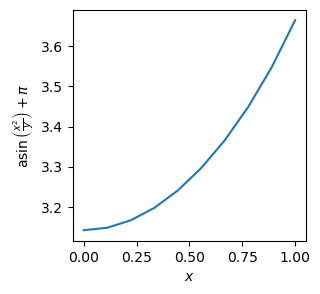

In [33]:
x_num = np.linspace(0, 1, 10)
y_num = 2
z_num = expr_f(x_num, y_num)

plt.figure(figsize=(3,3))
_ = plt.plot(x_num, z_num)
_ =plt.xlabel(f'${x}$')
_ =plt.ylabel(f'${smp.latex(expr)}$')

## 2.6. <a id='toc2_6_'></a>[Substitution](#toc0_)

In [34]:
F = x**2 + y * smp.sin(z)
F

x**2 + y*sin(z)

In [35]:
F.subs([(y, smp.tan(z)),
       (z, y)])

x**2 + sin(y)*tan(y)

In [36]:
F.subs([(y, 4),
       (x, smp.pi)])

4*sin(z) + pi**2

# 3. <a id='toc3_'></a>[Calculus](#toc0_)

## 3.1. <a id='toc3_1_'></a>[Limits](#toc0_)

In [37]:
x = smp.symbols('x', real=True)
expr = smp.sin(x/2 + smp.sin(x))
expr

sin(x/2 + sin(x))

In [38]:
smp.limit(expr, x, smp.pi, dir='+')

1

In [39]:
f = ((1 + smp.sin(x)) / (1 - smp.cos(x))) ** 2
smp.limit(f, x, 0, dir='-')

oo

In [40]:
f = 2*smp.exp(1/x) / (smp.exp(1/x) + 1)
f

2*exp(1/x)/(exp(1/x) + 1)

In [41]:
f.limit(x, smp.oo, dir='-')

1

## 3.2. <a id='toc3_2_'></a>[Derivitives](#toc0_)

### 3.2.1. <a id='toc3_2_1_'></a>[First derivative](#toc0_)

In [42]:
smp.diff(f, x) # f.diff(x) works also

-2*exp(1/x)/(x**2*(exp(1/x) + 1)) + 2*exp(2/x)/(x**2*(exp(1/x) + 1)**2)

In [43]:
f.diff(x).simplify()

-1/(2*x**2*cosh(1/(2*x))**2)

### 3.2.2. <a id='toc3_2_2_'></a>[Nth-derivative](#toc0_)

$$ \frac{d}{dx}\left(\frac{a+\sin x}{b-\cos x} \right)^2 $$

In [44]:
x, a, b = smp.symbols('x a b', real=True)
fxy = ((a + smp.sin(x)) / (b - smp.cos(x))) ** 2
fxy

(a + sin(x))**2/(b - cos(x))**2

In [45]:
smp.diff(fxy, x, 1)

-2*(a + sin(x))**2*sin(x)/(b - cos(x))**3 + 2*(a + sin(x))*cos(x)/(b - cos(x))**2

In [46]:
# Second derivitive
smp.diff(fxy, x, 2).simplify()

2*(-(a + sin(x))**2*(b*cos(x) + cos(2*x) - 2) - 4*(a + sin(x))*(b - cos(x))*sin(x)*cos(x) + (b - cos(x))**2*(-a*sin(x) + cos(2*x)))/(b - cos(x))**4

In [47]:
smp.diff(fxy, (x, 2), (a, 2))

-4*(cos(x) - 3*sin(x)**2/(b - cos(x)))/(b - cos(x))**3

## 3.3. <a id='toc3_3_'></a>[Abstract functions](#toc0_)

$$ \frac{d}{dx} {f(x+g(x))}$$

In [48]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x + g)
f

f(x + g(x))

In [49]:
df_dx = f.diff(x)
df_dx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [50]:
df_dx.subs([(g, smp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [51]:
df_dx.subs([(g, smp.sin(x))]).doit()

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

## 3.4. <a id='toc3_4_'></a>[Integrals](#toc0_)

### 3.4.1. <a id='toc3_4_1_'></a>[Primitive (antiderivative)](#toc0_)

$$ \int{csc(x)cot(x)dx}$$ 

In [52]:
f = smp.csc(x) * smp.cot(x)
f

cot(x)*csc(x)

In [53]:
smp.integrate(f, x) # f.integrate(x) work also

-1/sin(x)

In [54]:
f = 4*smp.sec(3*x)*smp.tan(3*x)
f

4*tan(3*x)*sec(3*x)

In [55]:
f.integrate(x)

4/(3*cos(3*x))

In [56]:
f = (1 + smp.sqrt(x))**smp.Rational(1,3) / smp.sqrt(x)
f

(sqrt(x) + 1)**(1/3)/sqrt(x)

In [57]:
smp.integrate(f, x).simplify()

3*(sqrt(x) + 1)**(4/3)/2

### 3.4.2. <a id='toc3_4_2_'></a>[Definite Integral](#toc0_)

In [58]:
f = smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9)
f

exp(x)/sqrt(exp(2*x) + 9)

In [59]:
# Get symbolic expression
smp.integrate(f, 
              (x, 0, smp.log(4))
             )

-asinh(1/3) + asinh(4/3)

In [60]:
f = x**2 * smp.sin(smp.pi*x)*smp.exp(-(x**2)/2)
f

x**2*exp(-x**2/2)*sin(pi*x)

In [61]:
smp.integrate(f, (x, 0, smp.oo)).evalf()

-0.132784425081616

In [62]:
# Get Numerical value
smp.integrate(f, 
              (x, 0, smp.log(4))).evalf()

0.00411734683880994

In [63]:
t = smp.symbols('t', real=True, positive=True)
f = x**10 * smp.exp(x)
f

x**10*exp(x)

In [64]:
smp.integrate(f, (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

### 3.4.3. <a id='toc3_4_3_'></a>[Improper Integrals](#toc0_)

In [65]:
f = 16 * smp.atan(x) / (1 + x**2)
f

16*atan(x)/(x**2 + 1)

In [66]:
smp.integrate(f, (x, 0, smp.oo))

2*pi**2

### 3.4.4. <a id='toc3_4_4_'></a>[Multiple Integrals](#toc0_)

In [67]:
x, y = smp.symbols('x y', real=True)
f = smp.exp(2*x) * smp.ln(3*x + y**2)
f

exp(2*x)*log(3*x + y**2)

In [68]:
smp.integrate(f, (x, 0, 1), (y, 0, 1))


Integral(Integral(exp(2*x)*log(3*x + y**2), (x, 0, 1)), (y, 0, 1))

# 4. <a id='toc4_'></a>[Discrete Math](#toc0_)

In [69]:
n, k = smp.symbols('n, k', integer=True)

## 4.1. <a id='toc4_1_'></a>[Combinatory Analysis](#toc0_)

In [70]:
smp.factorial(n)

factorial(n)

In [71]:
smp.factorial(5)

120

In [72]:
smp.binomial(n, k)

binomial(n, k)

In [73]:
smp.binomial(5, 2)

10

In [74]:
smp.factorial(n) / smp.factorial(k-2)

factorial(n)/factorial(k - 2)

## 4.2. <a id='toc4_2_'></a>[Summation](#toc0_)

In [75]:
expr = 6 / (4**n)
expr

6/4**n

In [76]:
smp.Sum(expr, (n, 0, smp.oo))

Sum(6/4**n, (n, 0, oo))

In [77]:
smp.Sum(expr, (n, 0, smp.oo)).doit()

8

*
$$\sum_{n=1} ^{\infty}\frac{1}{n^2} $$

In [78]:
smp.Sum(1 / n**2, (n, 1, smp.oo))
smp.Sum(1 / n**2, (n, 1, smp.oo)).doit()

pi**2/6

In [79]:
expr = 2**(n+1) / 5**n
expr

2**(n + 1)/5**n

In [80]:
smp.Sum(expr, (n, 0, smp.oo)).doit()

10/3

In [81]:
smp.Sum(expr, (n, 0, smp.oo)).evalf()

3.33333333333333

In [82]:
expr = smp.atan(n) / n**smp.Rational(11,10)
expr

atan(n)/n**(11/10)

In [83]:
smp.Sum(expr, (n, 1, smp.oo)).doit()

Sum(atan(n)/n**(11/10), (n, 1, oo))

In [84]:
smp.Sum(expr, (n, 1, smp.oo)).n()

15.3028821020457

In [85]:
expr = (1 + smp.cos(n)) / n**2
expr

(cos(n) + 1)/n**2

In [86]:
smp.Sum(expr, (n, 1, smp.oo)).doit()

Sum((cos(n) + 1)/n**2, (n, 1, oo))

In [87]:
smp.Sum(expr, (n, 1, smp.oo)).n(n=30)

1.9691

## 4.3. <a id='toc4_3_'></a>[Production](#toc0_)

In [88]:
expr = 1/n
smp.Product(expr, (n, 1, 4))

Product(1/n, (n, 1, 4))

In [89]:
smp.Product(expr, (n, 1, 4)).evalf()

0.0416666666666667

## 4.4. <a id='toc4_4_'></a>[Taylor Series](#toc0_)

In [90]:
expr = 1 / smp.sqrt(1 - 2 * n)
expr

1/sqrt(1 - 2*n)

In [91]:
expr.series(n, 0, 7)

1 + n + 3*n**2/2 + 5*n**3/2 + 35*n**4/8 + 63*n**5/8 + 231*n**6/16 + O(n**7)

# 5. <a id='toc5_'></a>[Matrix and Linear Algebra](#toc0_)

## 5.1. <a id='toc5_1_'></a>[Special Matrix](#toc0_)

In [92]:
smp.zeros(2)

Matrix([
[0, 0],
[0, 0]])

In [93]:
smp.ones(2)

Matrix([
[1, 1],
[1, 1]])

In [94]:
smp.eye(3)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

## 5.2. <a id='toc5_2_'></a>[Matrix Operations](#toc0_)

In [95]:
a, b, c, d, e, f, g, h, i = smp.symbols('a:i', integer=True)
m = [[a, b, c],
    [d, e, f],
    [g, h, i]]

In [96]:
m = smp.Matrix(m)
m

Matrix([
[a, b, c],
[d, e, f],
[g, h, i]])

In [97]:
m.det()

a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g

In [98]:
m.inv()

Matrix([
[ (e*i - f*h)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g), (-b*i + c*h)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g),  (b*f - c*e)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)],
[(-d*i + f*g)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g),  (a*i - c*g)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g), (-a*f + c*d)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)],
[ (d*h - e*g)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g), (-a*h + b*g)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g),  (a*e - b*d)/(a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g)]])

In [99]:
mat = np.random.randint(-5, 5, size=[3,3])
m = smp.Matrix(mat)
m

Matrix([
[-4, -3, -3],
[ 3, -1,  2],
[-5,  4,  4]])

In [100]:
m.det()

93

In [101]:
m.inv()

Matrix([
[ -4/31,    0, -3/31],
[-22/93, -1/3, -1/93],
[  7/93,  1/3, 13/93]])

In [102]:
m * m.inv()

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [103]:
m.norm()

sqrt(105)

# 6. <a id='toc6_'></a>[Geometry](#toc0_)

In [104]:
a = smp.Point(-2, -3)
b = smp.Point(2, 3)
a, b

(Point2D(-2, -3), Point2D(2, 3))

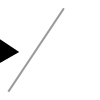

In [105]:
l = smp.Line(a, b)
l

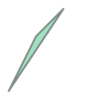

In [106]:
c = smp.Circle((0, 1), 2)
t = smp.Triangle(a, b, c.center)
t

In [107]:
c.is_tangent(l)

False

# 7. <a id='toc7_'></a>[Plotting](#toc0_)

## 7.1. <a id='toc7_1_'></a>[Plot 2D](#toc0_)

In [113]:
x, y = smp.symbols('x y', real=True)
f = smp.symbols('f', cls=smp.Function)
f = (x + 1)  ** 3 + 5
df1 = f.diff(x)
df2 = f.diff(x, 2)

display(f, df1, df2)

(x + 1)**3 + 5

3*(x + 1)**2

6*(x + 1)

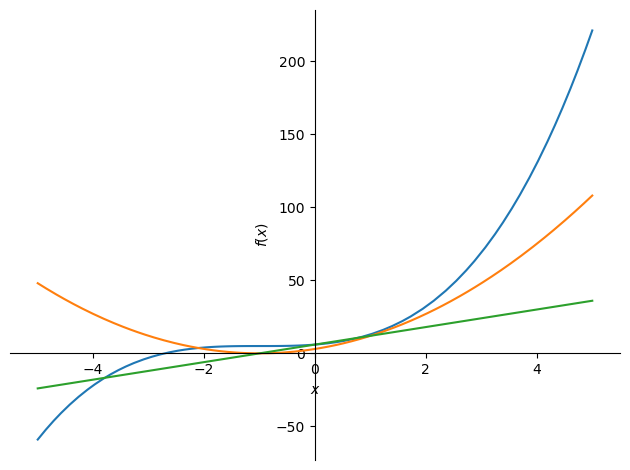

In [114]:
from sympy.plotting import plot, plot3d
_ = plot(
    (f, [x, -5, 5]), 
    (df1, [x, -5, 5]),
    (df2, [x, -5, 5]), show=True
)

### 7.1.1. <a id='toc7_1_1_'></a>[Plot 3D](#toc0_)

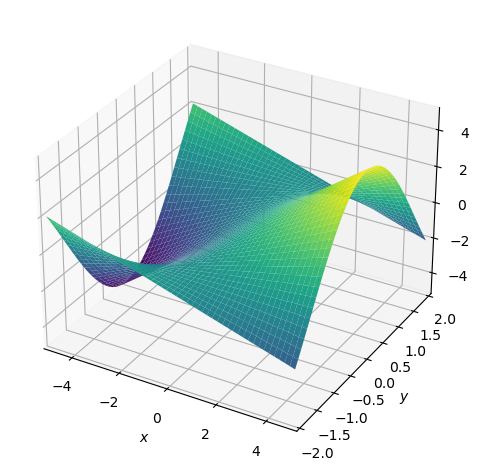

In [116]:
_ = plot3d(x*smp.cos(y), (x, -5, 5), (y, -2, 2))